### Student Information
Name:李恩

Student ID:114033634

GitHub ID:NN92002

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import helpers.data_mining_helpers as dmh
import nltk
import math
nltk.download("punkt")
nltk.download("punkt_tab")
ND = pd.read_csv(r"C:\Users\AN515\Desktop\DM2025-Lab1-Exercise\newdataset\Reddit-stock-sentiment.csv")
print(len(ND))
print(ND.columns)


847
Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AN515\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\AN515\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
ND[::100]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
100,comment,2025-04-11 15:01:48,mmknyf6,StockMarket,The Trump administration is begging Xi Jinping...,Darkstar197,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,Do we have a copy of trump’s kindergarten grad...,0.400000,-0.050000,-1.0,"['certificate', 'version', 'form', '’', 'trump...",-1.0
200,comment,2025-04-11 14:42:17,mmkk04x,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,coochellamai,https://i.redd.it/uajqu4kxl7ue1.png,1,NaN,NaN,I need people to understand this man is NOT st...,0.604242,-0.260227,-1.0,"['plan', 'goal', 'man', 'USD', 'US', 'economy'...",1.0
300,comment,2022-04-23 20:11:55,i5x0o24,stockstobuytoday,Technical Analysis Thread.,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,[/](/),0.000000,0.000000,0.0,"['/', ']']",0.0
400,comment,2025-04-11 14:30:36,mmkhog3,StockMarket,"Trump is surrounded by a bunch of idiots, he s...",gonzo0815,https://i.redd.it/c2mmpy3qf7ue1.png,1,NaN,NaN,Imo it's bullshit for another reason: why woul...,0.391667,0.016667,1.0,"['reason', 'anything', 'relation', 'point', 'g...",-1.0
500,comment,2025-04-11 14:27:20,mmkh0uf,StockMarket,The Trump administration is begging Xi Jinping...,Bloodsucker_,https://edition.cnn.com/2025/04/10/politics/tr...,-2,NaN,NaN,Everyone is talking about the Bond market. But...,0.500000,0.000000,0.0,"['year', 'bond', 'everyone', 'market', 'Bond',...",0.0
600,comment,2025-04-11 13:55:11,mmkaotn,wallstreetbets,Weekly Earnings Thread 4/14 - 4/18,grhotz,https://i.redd.it/b51iqmecn7ue1.jpeg,2,NaN,NaN,Bank week is so boring. PUTS on NFLX,1.000000,-1.000000,-1.0,"['week', 'Bank', 'NFLX', 'Bank week']",-1.0
700,comment,2025-04-12 1:09:59,mmntum6,wallstreetbets,Retail giant TARGET has now declined for 10 co...,CuttyAllgood,https://i.redd.it/7tl6puv9waue1.jpeg,36,NaN,NaN,Donno why you’re getting downvoted. You’re not...,0.900000,-0.500000,-1.0,"['Donno', 'IMO']",1.0
800,comment,2025-04-11 15:27:34,mmkt7j7,stocks,Is the market in complete denial right now?,Vlistorito,https://www.reddit.com/r/stocks/comments/1jwo1...,4,NaN,NaN,"It's a pretty unremarkable product, but you wo...",0.625000,0.333333,1.0,"['information', 'distributor', 'product', 'com...",0.0


In [3]:
# 查看所有欄位的型態
ND[ND["text"].apply(lambda x: len(x) < 10)].head(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
21,comment,2025-04-06 23:31:33,mls3ha1,stockstobuytoday,If you had $10k in cash…,Either_Breadfruit_90,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,GEO WM,0.0,0.0,0.0,"['GEO', 'WM']",0.0
37,comment,2025-03-04 0:43:03,mfvnxnj,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,BippityBoppitty69,https://www.reddit.com/r/stocks/comments/1j0w7...,5,NaN,NaN,Cash,0.0,0.0,0.0,['Cash'],0.0
41,comment,2021-05-03 22:17:48,gwu560b,stockstobuytoday,"Shorted Stocks - Hedges crushing NAKD, FAMI, S...",Limp-Project5733,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,And plug,0.0,0.0,0.0,['plug'],0.0
55,comment,2025-04-11 16:00:46,mml01xt,stocks,The US bond market is continuing to crash. Wil...,J3ster14,https://www.reddit.com/r/stocks/comments/1jwsz...,1,NaN,NaN,The steal,0.0,0.0,0.0,['steal'],0.0
109,comment,2025-04-10 14:34:18,mme7ouv,StockMarket,How do you feel about a sitting president maki...,TimoGloc,https://apnews.com/article/trump-truth-social-...,7,NaN,NaN,FELON,0.0,0.0,0.0,['FELON'],-1.0


In [4]:
ND[ND["type"]=="comment"][::50]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
52,comment,2025-04-11 15:12:13,mmkq2am,wallstreetbets,[IPO] AIRO IPO: Aerospace & Defense Play at $1...,likeitis121,https://i.redd.it/n22xlqjix7ue1.jpeg,2,NaN,NaN,>I did some digging and found they had a gover...,0.000000,0.000000,0.0,"[']', 'contract', 'Lockheed', 'Defense', 'gove...",-1.0
106,comment,2025-04-11 15:07:23,mmkp2zk,StockMarket,The Trump administration is begging Xi Jinping...,Bartallica,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,Over 9000%!,0.000000,0.000000,0.0,['%'],0.0
157,comment,2025-04-11 12:39:55,mmjxm0w,stocks,Is the market in complete denial right now?,Idontlikeredditorss,https://www.reddit.com/r/stocks/comments/1jwo1...,3,NaN,NaN,China raised tariffs even MORE a few hours ago...,0.525000,-0.350000,-1.0,"['yo', 'Bing', 'life', 'Fuck', 'bong', 'market...",-1.0
215,comment,2024-04-10 12:59:19,kywypcj,stockstobuytoday,Anyone seen the latest $PSQH news?,adetailgeek,https://www.reddit.com/r/stockstobuytoday/comm...,2,NaN,NaN,Now this is some wholesome stuff more companie...,0.000000,0.000000,0.0,['stuff'],1.0
266,comment,2025-04-11 21:22:20,mmmrtzq,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,OPINION_IS_REGARDED,https://www.reddit.com/r/wallstreetbets/commen...,22,NaN,NaN,I am so addicted to this market I can't wait f...,0.600000,-0.400000,-1.0,"['Monday', 'market']",1.0
317,comment,2025-04-10 16:06:40,mmeqe69,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,LatinHoser,https://www.reddit.com/r/stocks/comments/1jvzr...,2,NaN,NaN,What the actual fuck?,0.350000,-0.200000,-1.0,['fuck'],-1.0
375,comment,2025-04-10 16:52:24,mmezojg,StockMarket,How do you feel about a sitting president maki...,Xerio_the_Herio,https://apnews.com/article/trump-truth-social-...,2,NaN,NaN,Money and power go together... it's sick in th...,0.857143,-0.714286,-1.0,"['context', 'power', 'Money']",-1.0
433,comment,2021-02-01 17:19:02,glmekov,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",AtomicPhantomBlack,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,The thing is is that paper silver is much more...,0.171429,0.100000,1.0,"['thing', 'silver', 'paper']",0.0
491,comment,2025-04-11 6:38:09,mmitxzi,StockMarket,$ U.S. dollar value (crashing),Spinoza42,https://i.redd.it/atvlo83gk4ue1.jpeg,7,NaN,NaN,"Look up ""Dark Gothic MAGA how Tech billionaire...",0.233333,-0.116667,-1.0,"['plan', 'goal', 'Dark', 'US', 'stone', 'end',...",-1.0


In [5]:
ND.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In [6]:
print(sum(ND.duplicated()))
ND.drop_duplicates(keep=False, inplace=True)
print(len(ND))


0
847


In [7]:
ND_sample = ND.sample(n = 100)
print(len(ND))
ND_sample[::20]

847


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
32,comment,2025-04-11 13:22:49,mmk4qd8,StockMarket,Data Shows US Allies—Not China—Dumping Treasuries,Kaffe-Mumriken,https://i.redd.it/31r650bss4ue1.jpeg,1,NaN,NaN,Sorry; I’m dumb but is this not just a USD to ...,0.750000,-0.437500,-1.0,"['chart', 'Sorry', 'USD', 'conversion', 'dumb']",0.0
558,comment,2025-04-11 12:26:43,mmjvkle,stocks,BREAKING: China raises tariffs on U.S. goods t...,TrashPanda_924,https://www.reddit.com/r/stocks/comments/1jwku...,1,NaN,NaN,Who cares? Screw ‘em.,0.000000,0.000000,0.0,"['em', '‘', 'Screw']",0.0
128,comment,2024-02-10 19:03:36,kptggix,stockstobuytoday,Anyone looking into $EGOX?,Apprehensive-King270,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Entered yesterday 2-9-24. Fortunately I entere...,0.550000,0.062500,1.0,"['Potential', 'dip', 'yesterday', 'upswing', '...",1.0
156,comment,2025-04-11 13:14:07,mmk37xx,stocks,Formerly Stable US Treasuries Are Trading Like...,machyume,https://www.reddit.com/r/stocks/comments/1jwpf...,81,NaN,NaN,"Yeah, like has anyone realized what happens wh...",0.133333,0.166667,1.0,"['laugh', 'option', 'gold', 'ETFs', 'dollar', ...",-1.0
704,comment,2025-04-11 8:53:20,mmj6ppc,stocks,BREAKING: China raises tariffs on U.S. goods t...,awsengineer1,https://www.reddit.com/r/stocks/comments/1jwku...,23,NaN,NaN,Eli5 please,0.000000,0.000000,0.0,"['Eli5', 'please']",0.0


730
author
saasfin          57
AutoModerator    15
bullrfuk          5
MutaliskGluon     3
FarrisAT          3
Name: count, dtype: int64


<Axes: title={'center': 'top 5 author'}, xlabel='author'>

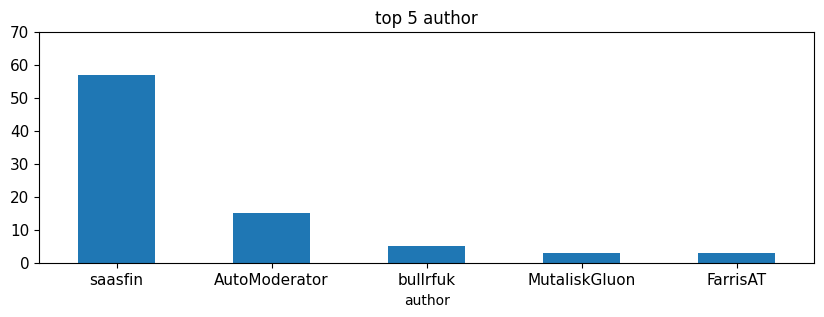

In [8]:
ND_notdeleted =ND[ND["author"]!= "[deleted]"]
print(len(ND_notdeleted["author"].value_counts()))
print(ND_notdeleted["author"].value_counts().head(5))
top = ND_notdeleted["author"].value_counts().head(5)
top.plot(kind = 'bar',
                title = 'top 5 author',
                ylim = [0, 70],        
                rot = 0, fontsize = 11, figsize = (10,3))

94
author
saasfin              2
gary_oldman_sachs    2
AutoModerator        2
eagermoron           1
Jimeriano            1
Name: count, dtype: int64


<Axes: title={'center': 'top 5 author'}, xlabel='author'>

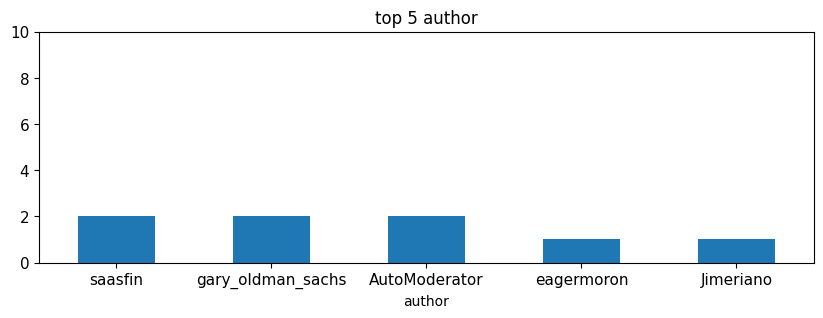

In [9]:
ND_sample_notdeleted =ND_sample[ND_sample["author"]!= "[deleted]"]
print(len(ND_sample_notdeleted["author"].value_counts()))
print(ND_sample_notdeleted["author"].value_counts().head(5))
top_sample = ND_sample_notdeleted["author"].value_counts().head(5)
top_sample.plot(kind = 'bar',
                title = 'top 5 author',
                ylim = [0, 10],        
                rot = 0, fontsize = 11, figsize = (10,3))

<Axes: title={'center': 'top 5 author comparison'}, xlabel='author'>

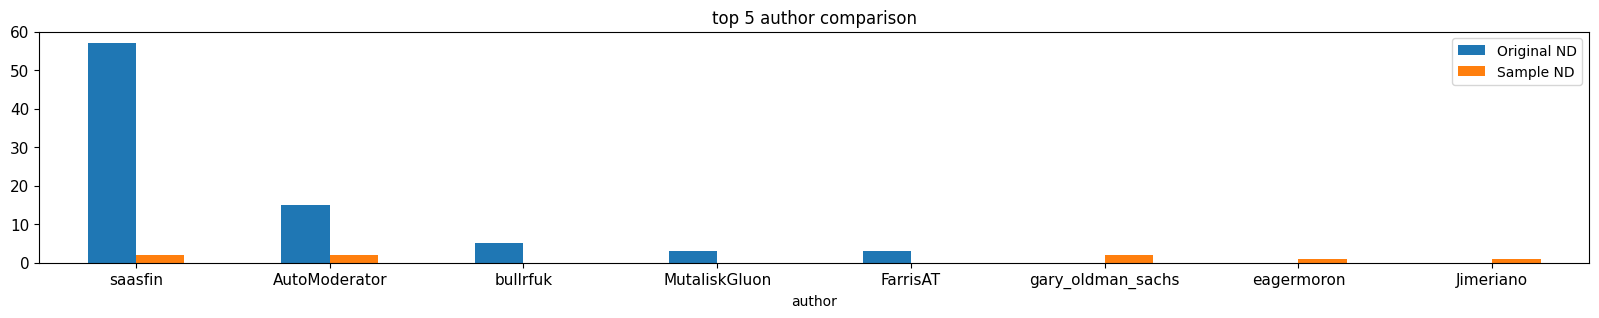

In [10]:
df = pd.concat([top.rename("Original ND"), top_sample.rename("Sample ND")],axis=1)

df.plot(kind = 'bar',
        title = 'top 5 author comparison',
        ylim = [0, 60],        
        rot = 0, fontsize = 11, figsize = (20,3))


In [11]:
ND.shape

(847, 16)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
ND_counts = count_vect.fit_transform(ND.text)
print(ND_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [13]:
count_vect.get_feature_names_out()[692]

'calls'

In [14]:
count_vect.get_feature_names_out()[2706]

'on'

In [15]:
count_vect.get_feature_names_out()[3248]

'retards'

In [16]:
analyze = count_vect.build_analyzer()
analyze(ND.text[0])

['calls', 'on', 'retards']

In [17]:
count_vect.get_feature_names_out()[0:10]


array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [18]:
ND_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [19]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [20]:
row, col =np.where(ND_counts[0:5, 0:100].toarray() > 0) 
for n in col:
    print(count_vect.get_feature_names_out()[n])

116


In [21]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_01378',
 'term_02',
 'term_027',
 'term_03',
 'term_06',
 'term_08',
 'term_10',
 'term_100',
 'term_1000',
 'term_10000',
 'term_100k',
 'term_100x',
 'term_10k',
 'term_10ks',
 'term_10yr',
 'term_11',
 'term_116',
 'term_118']

In [22]:
plot_y = ["doc_"+ str(i) for i in list(ND.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [23]:
plot_z = ND_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

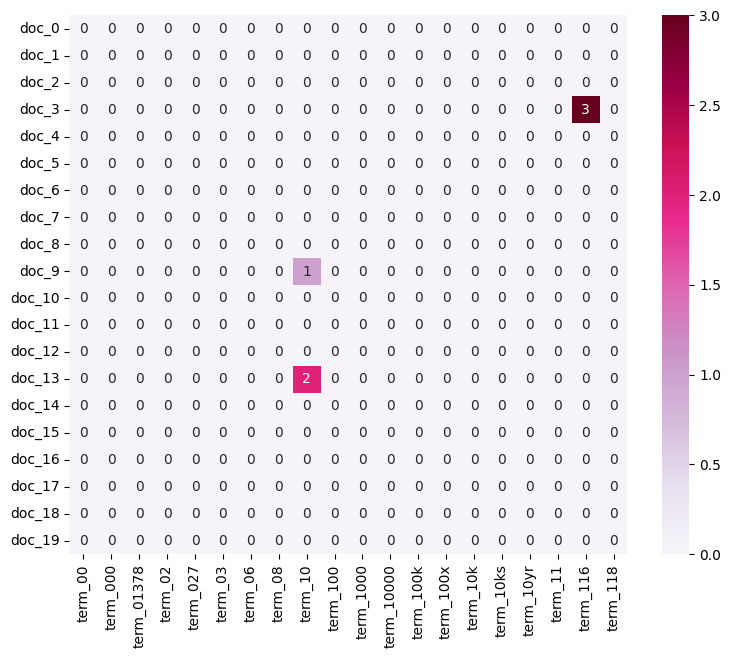

In [24]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=3, annot=True)

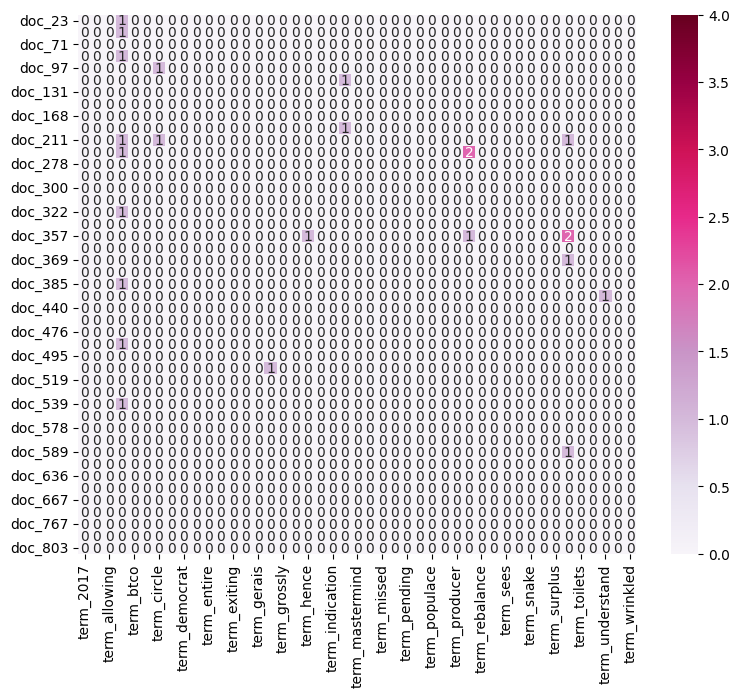

In [25]:
#隨機45個詞
rd_terms = np.random.choice(ND_counts.shape[1], 45, replace=False)
rd_terms = np.sort(rd_terms)#依序
terms = [count_vect.get_feature_names_out()[i] for i in rd_terms]

#隨機45篇文
rd_docs = np.random.choice(ND_counts.shape[0], 45, replace=False)
rd_docs = np.sort(rd_docs)

plot_x = ["term_"+str(i) for i in terms]
plot_y = ["doc_"+ str(i) for i in rd_docs]
plot_z = ND_counts[rd_docs][:,rd_terms].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=4, annot=True)

In [26]:
import plotly.graph_objects as go
term_frequencies = np.asarray(ND_counts.sum(axis=0)).ravel()
terms = count_vect.get_feature_names_out()
# 選出出現次數最高的前 300 個詞
top_idx = np.argsort(term_frequencies)[::-1][:300]
top_terms = terms[top_idx]
top_freqs = term_frequencies[top_idx]
fig = go.Figure(data=[go.Bar(x=top_terms, 
                             y=top_freqs,
                             marker_color='indianred')])
fig.update_layout(title='Top 300 Terms by Frequency',
                  xaxis_title='Terms',
                  yaxis_title='Frequencies',
                  xaxis_tickangle=-45,
                  width=1000, height=500)
fig.show()

In [27]:
# 不要先截斷 term_frequencies，直接保留全部詞頻
term_frequencies_all = np.asarray(ND_counts.sum(axis=0)).ravel()
terms = count_vect.get_feature_names_out()

# 找出全體詞彙裡出現次數最高的前 30 個
top_idx = np.argsort(term_frequencies_all)[::-1][:30]
top_terms = terms[top_idx]
top_freqs = term_frequencies_all[top_idx]

# 畫圖（保持你原本的格式）
fig = go.Figure(data=[go.Bar(x=top_terms, 
                             y=top_freqs,
                             marker_color='indianred')])
fig.update_layout(title='Top 30 Terms',
                  xaxis_title='Terms',
                  yaxis_title='Frequencies',
                  xaxis_tickangle=-45,
                  width=1000, height=500)
fig.show()

# Phase 2

In [ ]:
# === Begin Assignment Here ===
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 1) 取出類別（去掉缺值）
categories = pd.Series(ND['type']).dropna().unique()

# 2) 依類別切出子 DataFrame
category_dfs = {}
for category in categories:
    # 注意這裡要用變數 category，不是內建的 type
    sub = ND.loc[ND['type'] == category, ['text', 'type']].copy()
    sub = sub.dropna(subset=['text'])  # 丟掉沒有文字的
    sub['text'] = sub['text'].astype(str)
    category_dfs[category] = sub

# 3) 文字 → 詞頻矩陣 的小工具
def create_term_document_df(df):
    cv = CountVectorizer()
    X_counts = cv.fit_transform(df['text'])   # 稀疏矩陣
    words = cv.get_feature_names_out()
    # 若要可視化 / 輸出，轉成 DataFrame；資料大時可改回傳稀疏矩陣
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words, index=df.index)
    return term_document_df

# 4) 為每個類別建立 TDM DataFrame
filt_term_document_dfs = {}
for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])


comment: (783, 3883)
post: (64, 1110)


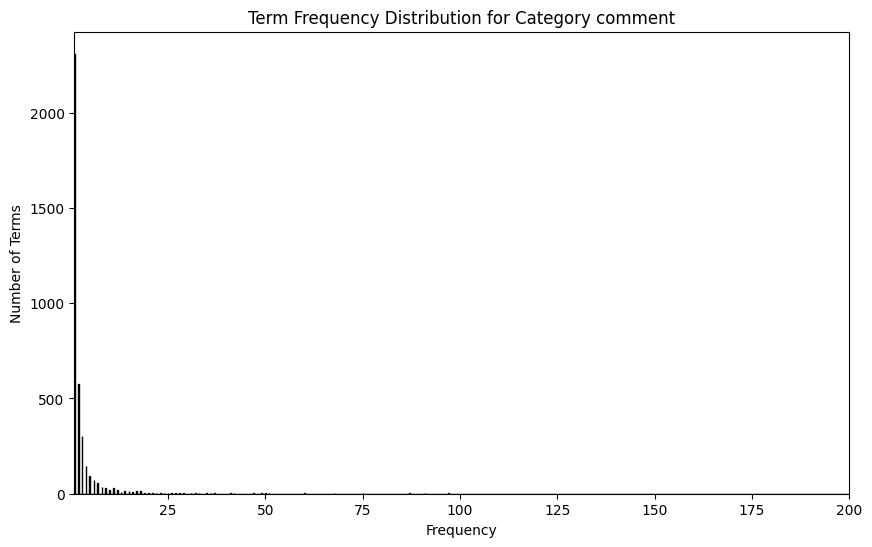

In [36]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [37]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies 排序後的
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order 排序後的詞頻值

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts) #計算詞彙輛
top_5_percent_index = int(0.05 * total_terms) #取前5%的詞數位置

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index] #用排序找出對應在原始矩陣位置

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]#儲存前5%最常出現的詞

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: comment
Number of terms in top 5%: 194
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'you', 'for', 'they', 'are', 'on', 'he', 'will', 'be', 'if', 'not', 'but', 'so', 'with', 'us', 'as', 'all', 'trump', 'was', 'have', 'at', 'just', 'what', 'my', 'can', 'we', 'china', 'or', 'like', 'has', 'there', 'now', 'no', 'market', 'about', 'more', 'their', 'people', 'do', 'his', 're', 'up', 'think', 'even', 'from', 'how', 'them', 'one', 'going', 'by', 'money', 'when', 'would', 'your', 'good', 'any', 'who', 'than', 'some', 'an', 'out', 'tariffs', 'him', 'why', 'see', 'only', 'other', 'get', 'been', 'make', 'then', 'time', 'over', 'don', 'silver', 'doing', 'want', 'me', 'because', 'still', 'down', 'go', 'right', 'could', 'day', 'economy', 'years', 'did', 'after', 'our', 'should', 'much', 'doesn', 'into', 'buy', 'really', 'way', 'here', 'long', 'last', 'too', 'also', 'world', 'first', 'dollar', 'most', 'back', 'trade', 'know', 'everyone', 'these', '10', 'year',

In [38]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: comment
Number of terms in bottom 1%: 38
Filtered terms: ['yelling', '13', '12855584', '1242', '118', '10yr', '10ks', '10k', '100x', '100k', '10000', '1000', 'yoyo', 'mutual', 'mute', 'muslims', '18', '1728', '1700', '17', '160', '153', '14th', '145', '140', '14', '06', '03', '027', '02', 'zgld', 'yield', '235', '234', '208', '2045', '2028', '2024']


In [39]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category comment we filter the following words:
Bottom 1.0% words: 
yelling     1
13          1
12855584    1
1242        1
118         1
10yr        1
10ks        1
10k         1
100x        1
100k        1
10000       1
1000        1
yoyo        1
mutual      1
mute        1
muslims     1
18          1
1728        1
1700        1
17          1
160         1
153         1
14th        1
145         1
140         1
14          1
06          1
03          1
027         1
02          1
zgld        1
yield       1
235         1
234         1
208         1
2045        1
2028        1
2024        1
dtype: int64
Top 5.0% words: 
big         13
selling     14
trading     14
before      14
made        14
          ... 
it         321
is         359
and        393
to         501
the        775
Length: 194, dtype: int64

For category post we filter the following words:
Bottom 1.0% words: 
yahoo                              1
access                             1
achieved                      

,00,000,100,11,12,125,15,150,17th,186,...,yippee,yo,young,yours,yourself,yourselves,youtube,yup,zero,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 769
Number of items : 3651
Minimum Transaction Size : 1
Average Transaction Size : 9.261378413524056
Maximum Transaction Size : 191
Standard Deviation Transaction Size : 13.032242847132421
Variance in Transaction Sizes : 170.0604986183355
Sparsity : 0.9974633310288896


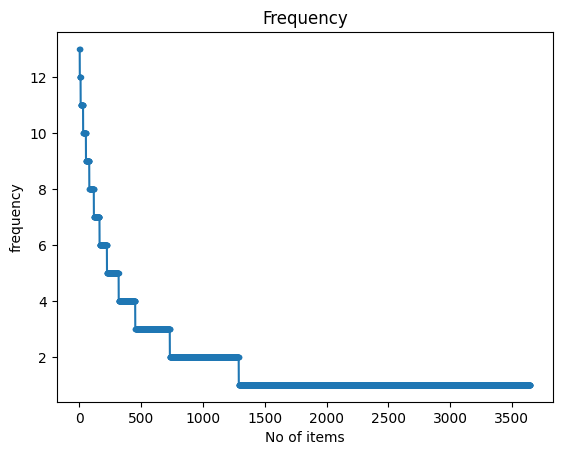

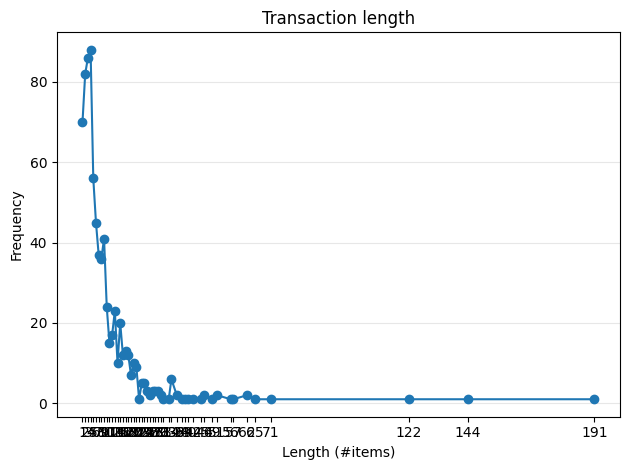

In [41]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(r"C:\Users\AN515\Desktop\DM2025-Lab1-Exercise\td_freq_db_comment.csv")
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 63
Number of items : 1044
Minimum Transaction Size : 1
Average Transaction Size : 25.444444444444443
Maximum Transaction Size : 156
Standard Deviation Transaction Size : 34.0358250931386
Variance in Transaction Sizes : 1177.1218637992831
Sparsity : 0.9756279267773521


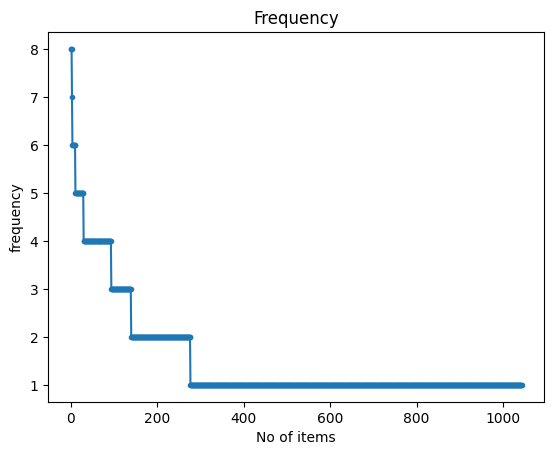

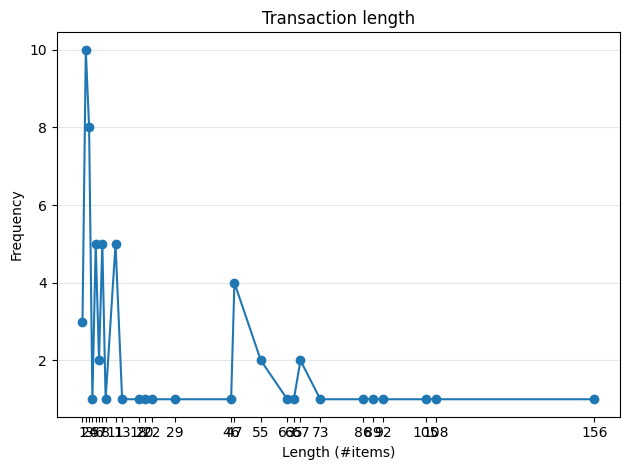

In [42]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(r"C:\Users\AN515\Desktop\DM2025-Lab1-Exercise\td_freq_db_post.csv")
obj.run()
obj.printStats()
obj.plotGraphs()

In [58]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj1 = alg.FPGrowth(iFile='td_freq_db_comment.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_comment= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comment))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 223
Runtime: 0.02385544776916504


In [59]:
obj1.save('freq_patterns_comment_minSup6.txt') #save the patterns
frequentPatternsDF_comment

,Patterns,Support
0,weeks,6
1,months,6
2,similar,6
3,office,6
4,try,6
...,...,...
218,ago,12
219,news,12
220,pretty,13
221,everything,13


In [60]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj2 = alg.FPGrowth(iFile='td_freq_db_post.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_post= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_post))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 15
Runtime: 0.0026755332946777344


In [61]:
obj2.save('freq_patterns_post_minSup6.txt') #save the patterns
frequentPatternsDF_post

,Patterns,Support
0,many,6
1,how,6
2,one,6
3,rise,6
4,btcusd,6
5,ethusd,6
6,ethusd\tbtcusd,6
7,pepeusd,6
8,pepeusd\tbtcusd,6
9,pepeusd\tethusd,6


In [62]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_comment, frequentPatternsDF_post]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                    Patterns  Support
219                   pretty       13
220               everything       13
221                    least       13
213                     said       12
218                     news       12
..                       ...      ...
224                     rise        6
231  btcusd\tpepeusd\tethusd        6
230          pepeusd\tethusd        6
229          pepeusd\tbtcusd        6
228                  pepeusd        6

[236 rows x 2 columns]
Number of patterns discarded: 2


In [67]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
ND_tdm = count_vect.fit_transform(ND['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
ND['tokenized_text'] = ND['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=ND.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = ND['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(ND_tdm.toarray(), columns=terms, index=ND.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,how,one,ethusd\tbtcusd,ethusd,btcusd,rise,btcusd\tpepeusd\tethusd,pepeusd\tethusd,pepeusd\tbtcusd,pepeusd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from PAMI.frequentPattern.topk import FAE  as alg

inputFile = r"C:\Users\AN515\Desktop\DM2025-Lab1-Exercise\td_freq_db_comment.csv"

for kCount in [500, 1000]:
    obj = alg.FAE(iFile=inputFile, k=kCount, sep='\t')    #initialize
    obj.mine()            #Start the mining process
    frequentPatternsDF= obj.getPatternsAsDataFrame()

    print('Total No of patterns: ' + str(len(frequentPatternsDF)))
    print('Runtime: ' + str(obj.getRuntime()))
    print('Memory (RSS): ' + str(obj.getMemoryRSS()))
    print('Memory (USS): ' + str(obj.getMemoryUSS()))

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.13839507102966309
Memory (RSS): 447086592
Memory (USS): 393908224
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1000
Runtime: 0.5194616317749023
Memory (RSS): 447086592
Memory (USS): 393908224


In [45]:
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm

for minsup in [3, 6, 9]:
    obj = alg.MaxFPGrowth(iFile=inputFile, minSup=minsup, sep='\t') #initialize
    obj.mine()            #start the mining process

    obj.save('maximalFrequentPatternsAtMinSupCount100.txt') #save the patterns


    frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
    print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
    print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

    print('Memory (RSS): ' + str(obj.getMemoryRSS()))
    print('Memory (USS): ' + str(obj.getMemoryUSS()))

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 705
Runtime: 0.0460362434387207
Memory (RSS): 447152128
Memory (USS): 393973760
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 223
Runtime: 0.01853799819946289
Memory (RSS): 447160320
Memory (USS): 393977856
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 80
Runtime: 0.009085655212402344
Memory (RSS): 447160320
Memory (USS): 393977856


In [68]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

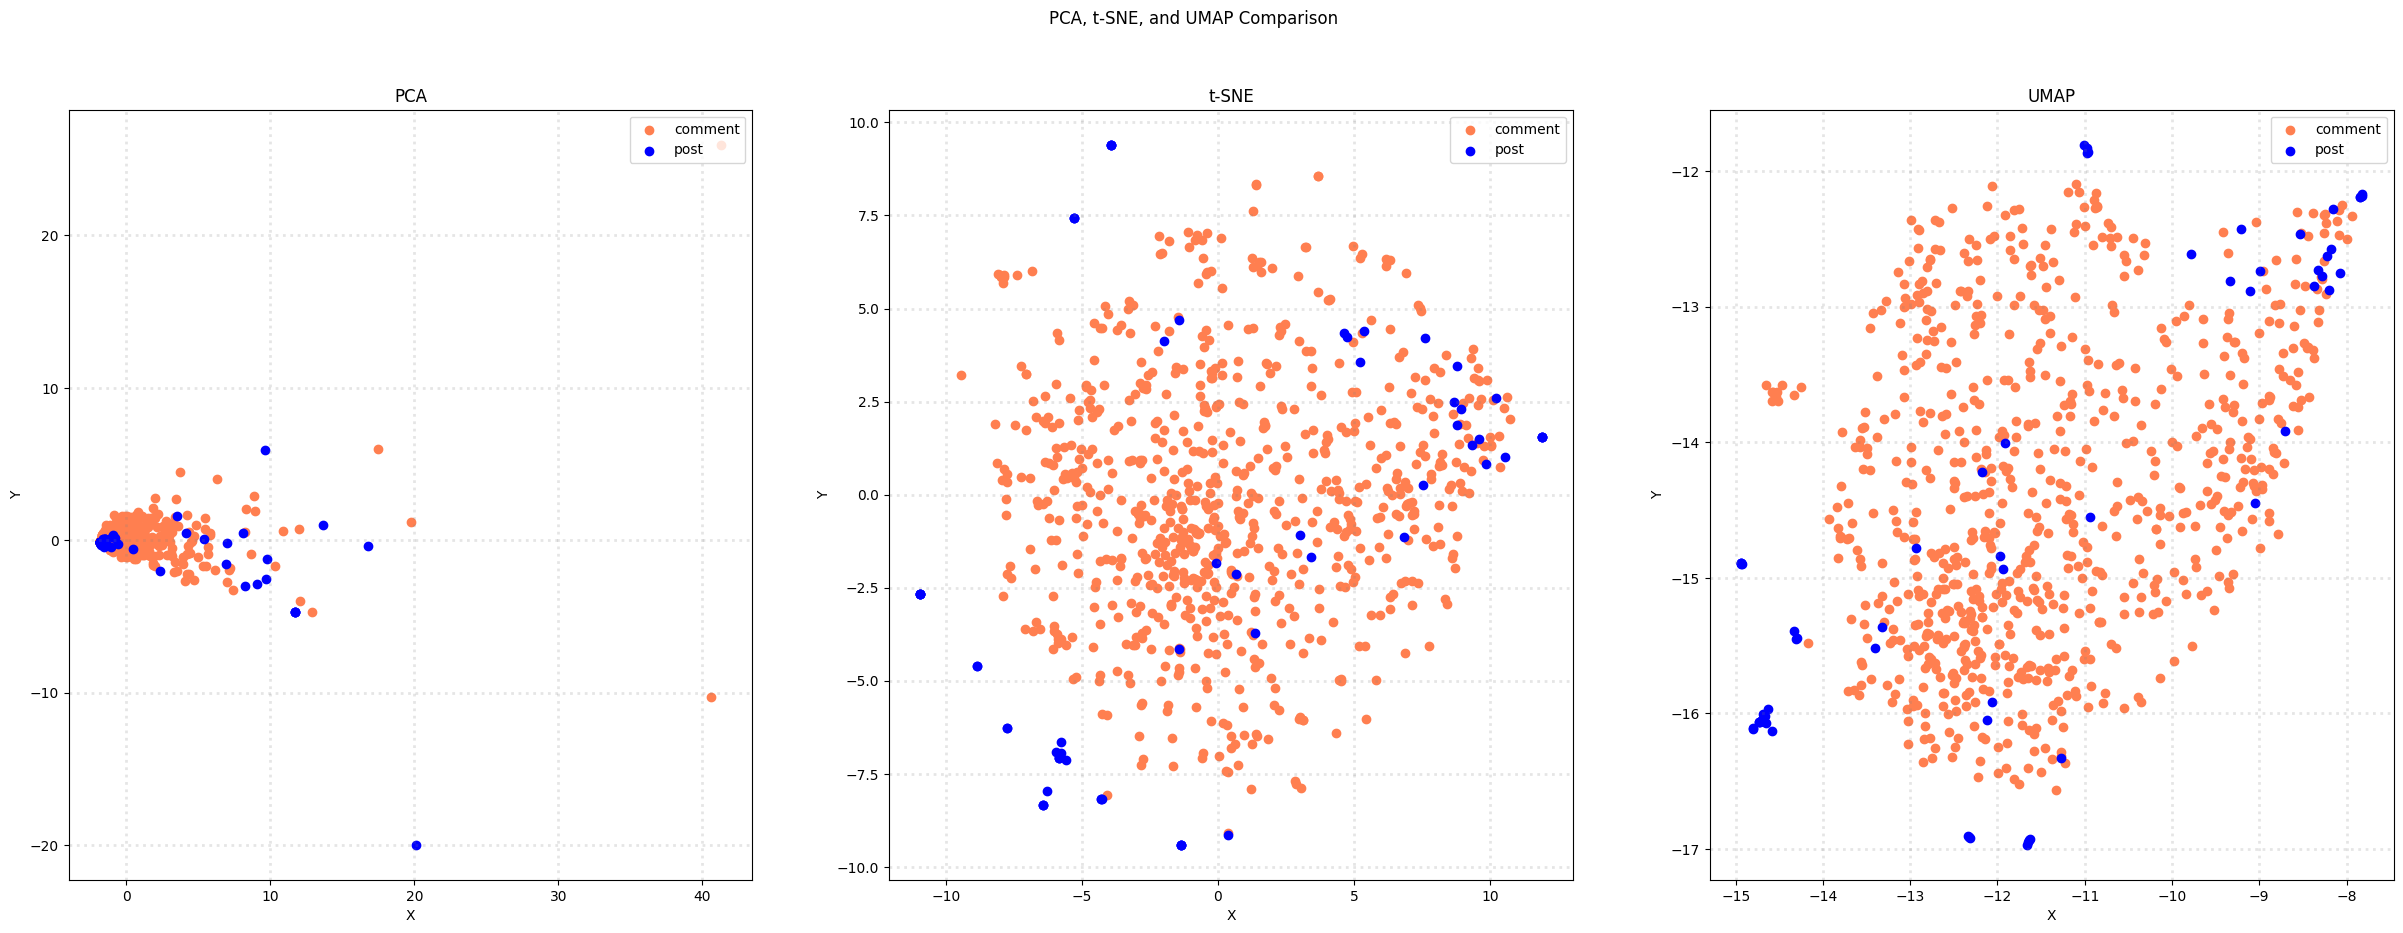

In [69]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = ND['type'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[ND['type'] == category].T[0]
        ys = X_reduced[ND['type'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [70]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

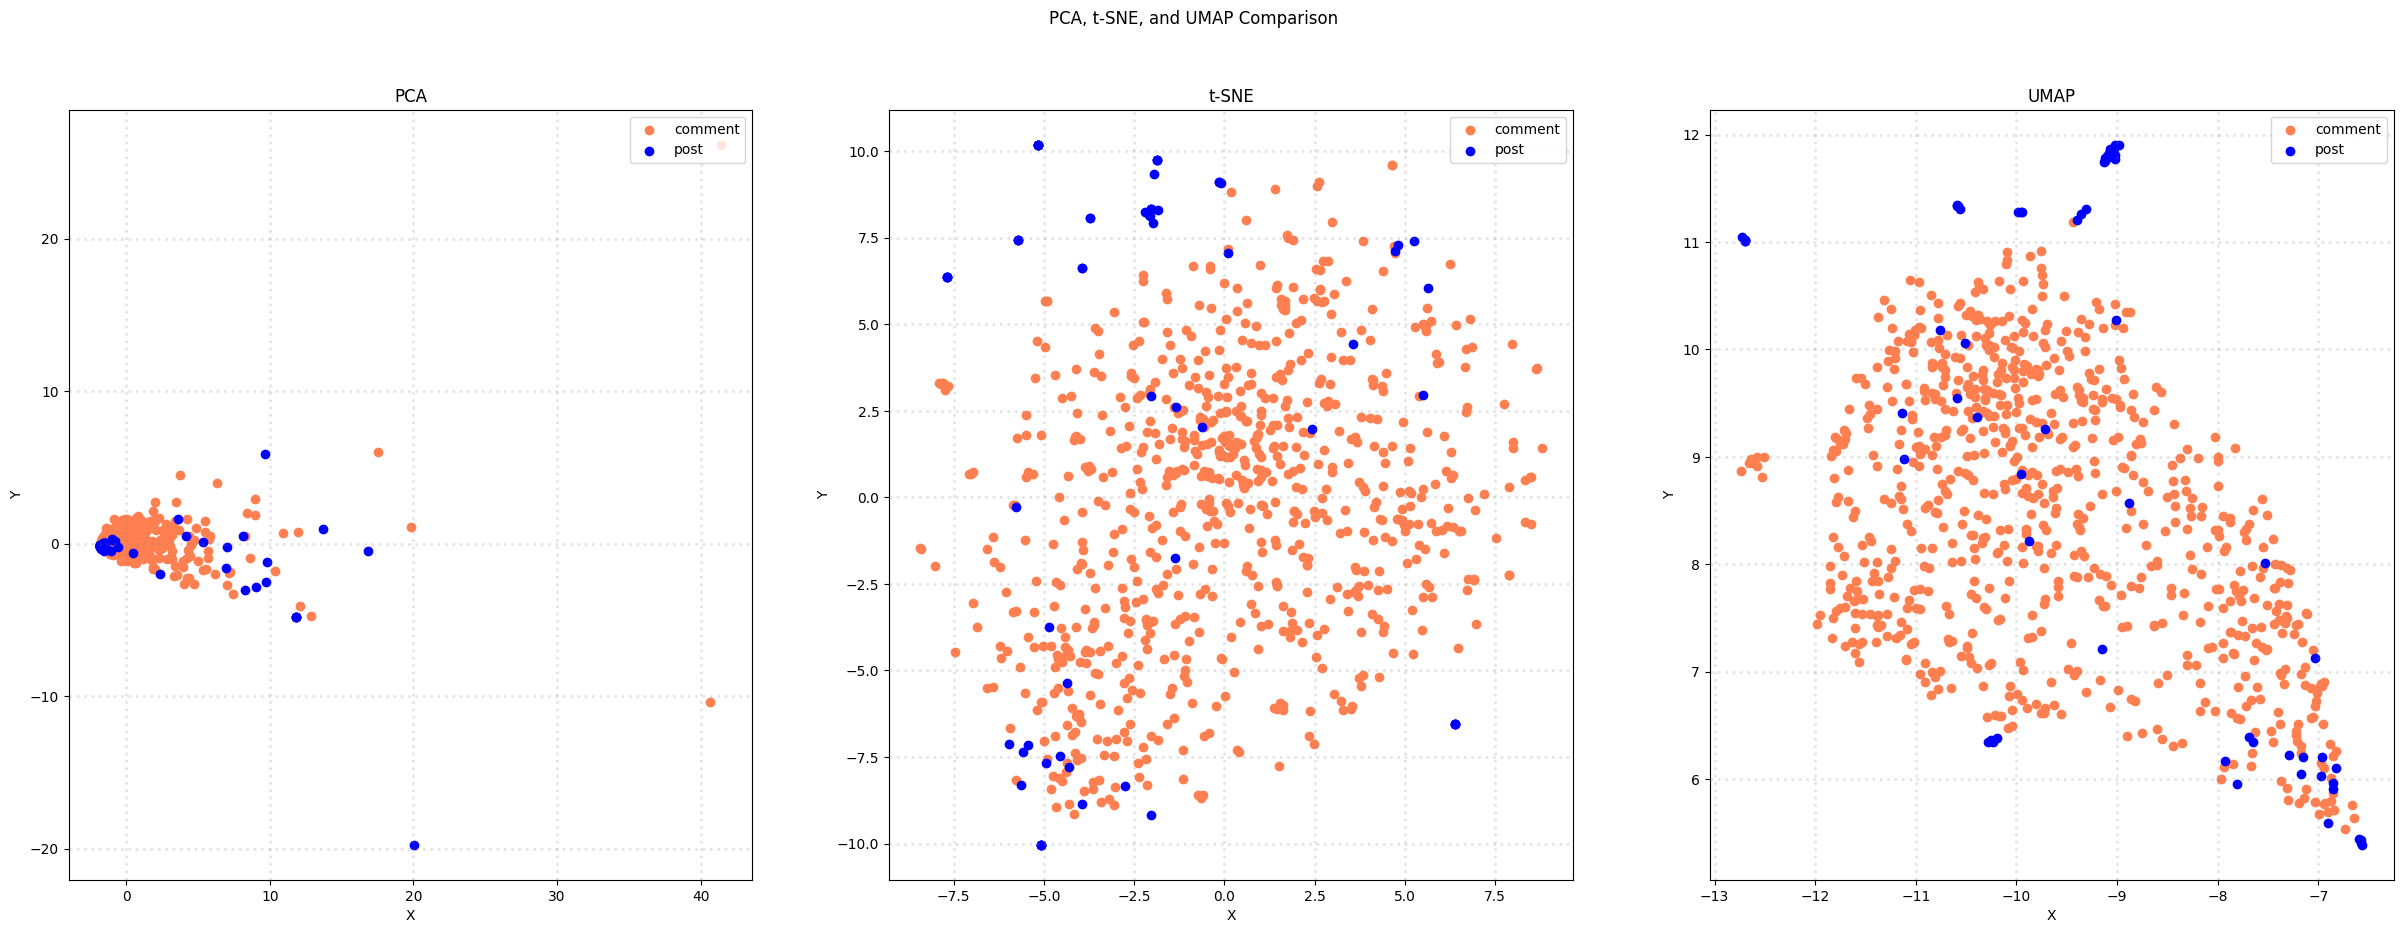

In [71]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = ND['type'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[ND['type'] == category].T[0]
        ys = X_reduced[ND['type'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [72]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D投影模組

# Step 1: 將資料降維成 3 維
X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(tdm_df.values)

c:\Users\AN515\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [73]:
import numpy as np
categories = np.zeros(len(tdm_df))  # 沒有標籤就全部設為 0

# Step 2: 繪製三個 3D 圖（不同演算法）
def plot_3d(data, title, elev, azim):
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(data[:,0], data[:,1], data[:,2],
                    c=categories, cmap='viridis', s=10)
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.view_init(elev=elev, azim=azim)  # 改變攝影機角度
    plt.show()

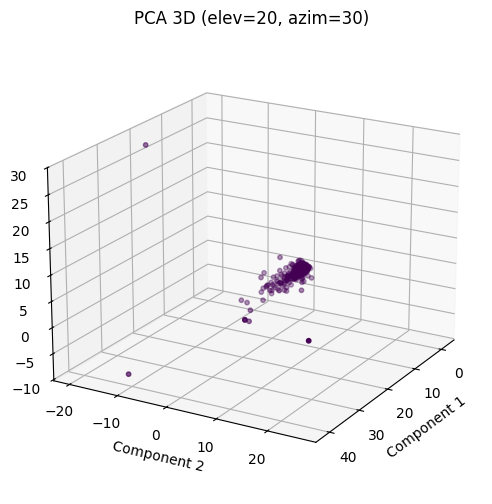

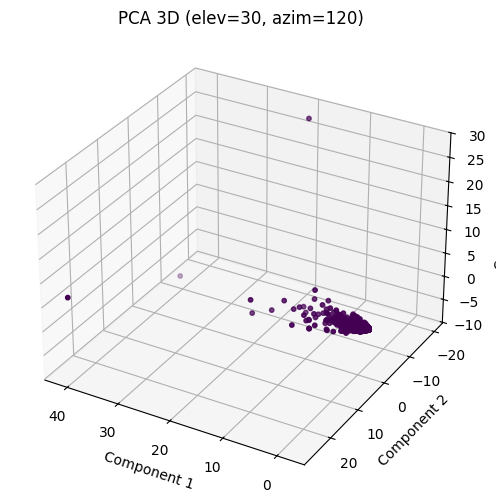

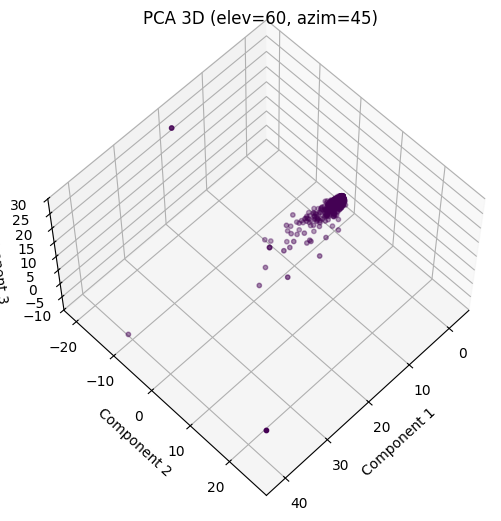

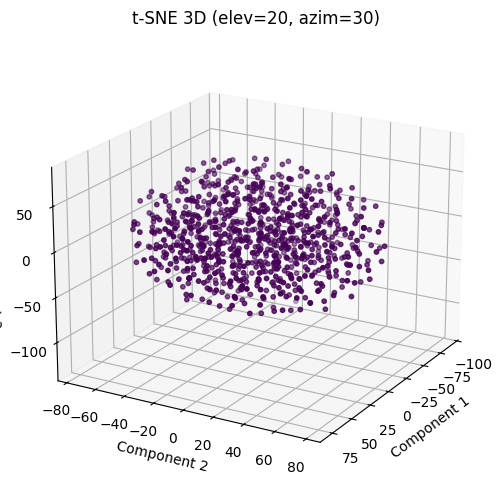

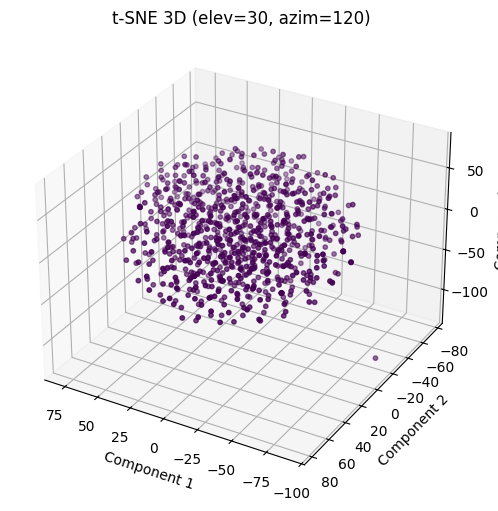

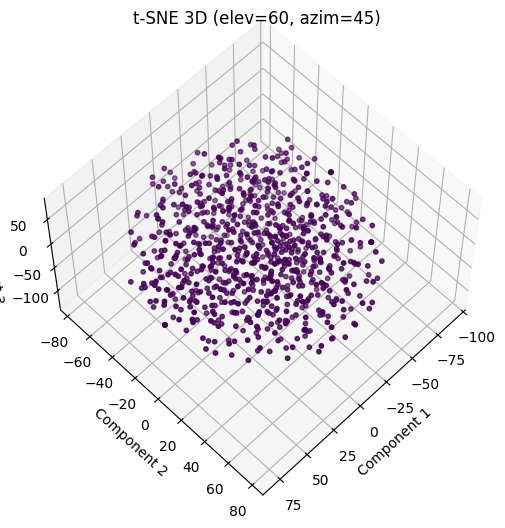

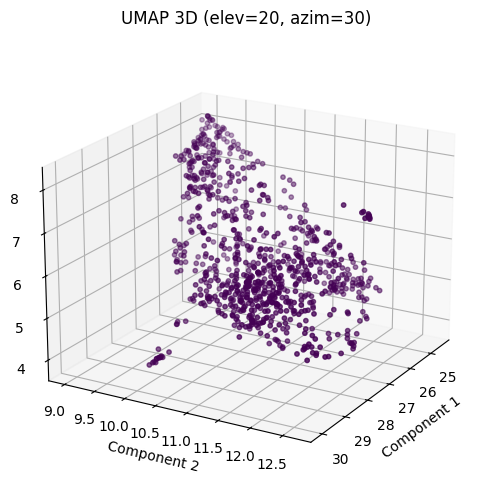

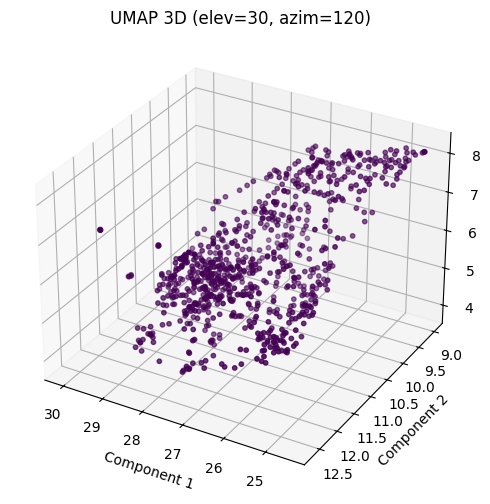

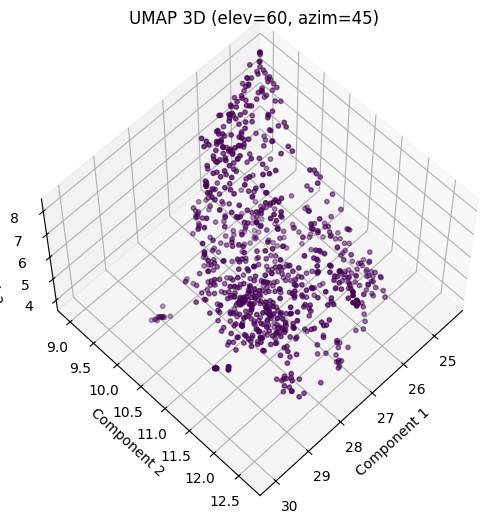

In [74]:
angles = [(20, 30), (30, 120), (60, 45)]

for elev, azim in angles:
    plot_3d(X_pca_3d, f"PCA 3D (elev={elev}, azim={azim})", elev, azim)

for elev, azim in angles:
    plot_3d(X_tsne_3d, f"t-SNE 3D (elev={elev}, azim={azim})", elev, azim)

for elev, azim in angles:
    plot_3d(X_umap_3d, f"UMAP 3D (elev={elev}, azim={azim})", elev, azim)

In [86]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(ND.subreddit)

,neg_label,0
,pos_label,1
,sparse_output,False


In [88]:
ND['subreddit_name'] = mlb.transform(ND['subreddit'].tolist())
ND[0:9]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,tokenized_text,type_name,subreddit_name
0,0,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"{retards, on, Calls}",0,0
1,0,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"{politics, they, even, a, first, in, deal, Stu...",0,0
2,0,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,"{ticker., Seeing, lots, red, of, the, in}",0,1
3,0,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,"{Hold, onto, ripples, a, ripple, Torrente, in,...",0,0
4,0,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,"{say, you., He, thank, didn’t}",0,1
5,0,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0,"{warm, puss, wish, luck, Hoping, ejaculate, to...",0,0
6,0,2025-04-11 12:37:23,mmjx7vz,stocks,Is the market in complete denial right now?,stoniey84,https://www.reddit.com/r/stocks/comments/1jwo1...,5,NaN,NaN,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0,"{respond, even, increasing, i, will, their, ar...",0,0
7,0,2025-04-11 17:28:50,mmlhxwc,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,https://i.redd.it/0yq2ftren8ue1.jpeg,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0,"{this, for, have, a, let, not, mouth, of, Conf...",0,0
8,0,2021-02-01 15:36:32,gllyi5z,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0,"{Follow, on, seeing, a, Am, here?, high?, cup,...",0,0


In [94]:
from sklearn.metrics.pairwise import cosine_similarity

document_to_transform_1 = []
random_record_1 = ND.iloc[10] #取第10筆資料
random_record_1 = random_record_1['text']#選'text'欄
document_to_transform_1.append(random_record_1)#寫到ocument_to_transform_1

document_to_transform_2 = []
random_record_2 = ND.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

print(document_to_transform_1)
print(document_to_transform_2)

document_vector_count_1 = count_vect.transform(document_to_transform_1)#轉成向量
document_vector_count_2 = count_vect.transform(document_to_transform_2)

print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})

["It's a copy/paste from a Bloomberg terminal."]
['Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.']
Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count bw 1 and 2: 0.109109


C:\Users\AN515\AppData\Local\Temp\ipykernel_9720\1892876884.py:24: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [101]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(ND[['subreddit', 'subreddit_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, ND['subreddit'], test_size=0.3, random_state=42)
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=2))

Accuracy: 0.5529411764705883
                  precision    recall  f1-score   support

     StockMarket       0.56      0.61      0.58        72
          stocks       0.49      0.74      0.59        87
stockstobuytoday       0.78      0.37      0.50        49
  wallstreetbets       0.68      0.32      0.43        47

        accuracy                           0.55       255
       macro avg       0.63      0.51      0.53       255
    weighted avg       0.60      0.55      0.54       255



In [106]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# 將兩者都轉為 numpy 陣列
X_augmented = np.concatenate((ND_tdm.toarray(), augmented_df.to_numpy()), axis=1)
y = ND['subreddit']

# 分割資料
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y, test_size=0.3, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=2))

Accuracy: 0.5568627450980392
                  precision    recall  f1-score   support

     StockMarket       0.57      0.58      0.58        72
          stocks       0.51      0.71      0.59        87
stockstobuytoday       0.74      0.41      0.53        49
  wallstreetbets       0.56      0.38      0.46        47

        accuracy                           0.56       255
       macro avg       0.59      0.52      0.54       255
    weighted avg       0.58      0.56      0.55       255



In [108]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, y, test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, digits=2))

Decision Tree Accuracy (TDM): 0.4392156862745098
                  precision    recall  f1-score   support

     StockMarket       0.42      0.44      0.43        72
          stocks       0.49      0.40      0.44        87
stockstobuytoday       0.56      0.49      0.52        49
  wallstreetbets       0.33      0.45      0.38        47

        accuracy                           0.44       255
       macro avg       0.45      0.45      0.44       255
    weighted avg       0.45      0.44      0.44       255



In [110]:
#Answer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# 將兩者都轉為 numpy 陣列
X_augmented = np.concatenate((ND_tdm.toarray(), augmented_df.to_numpy()), axis=1)
y = ND['subreddit']

# 分割資料
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=2))

Accuracy: 0.5568627450980392
                  precision    recall  f1-score   support

     StockMarket       0.57      0.58      0.58        72
          stocks       0.51      0.71      0.59        87
stockstobuytoday       0.74      0.41      0.53        49
  wallstreetbets       0.56      0.38      0.46        47

        accuracy                           0.56       255
       macro avg       0.59      0.52      0.54       255
    weighted avg       0.58      0.56      0.55       255

